In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-weather-data-from-1979-to-2023/london_weather_data_1979_to_2023.csv




#### **1. Dataset Overview**
We loaded the dataset using `pandas` and displayed the first 5 rows of the data. This gives an idea of the structure and content of the dataset.

#### **2. Check for Missing Values**
Missing values were identified in the dataset by replacing placeholder values (-9999) with `NaN`. A summary of the missing data was displayed.

#### **3. Summary Statistics**
Summary statistics of numerical columns were calculated to get insights into measures like mean, min, max, and standard deviation.

#### **4. Convert Date Column**
The `DATE` column, originally in `YYYYMMDD` format, was converted to a proper datetime format for easier analysis of time-based trends.

#### **5. Visualize Temperature Trends**
A time series line plot of the daily mean temperature (TG) was created to understand trends and patterns in the temperath')
plt.xlabel('Year')
plt.ylabel('Snow Depth (cm)')
plt.xticks(rotation=90)
plt.grid()
plt.show()
```

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/london-weather-data-from-1979-to-2023/london_weather_data_1979_to_2023.csv'
df = pd.read_csv(file_path)

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check the dataset structure
print("\nDataset Info:")
print(df.info())

# Replace placeholder for missing values (-9999) with NaN
df.replace(-9999, np.nan, inplace=True)


First 5 rows of the dataset:
       DATE    TX  Q_TX    TN  Q_TN    TG  Q_TG    SS  Q_SS   SD  ...   RR  \
0  19790101  23.0     0 -75.0     0 -41.0     0  70.0     0  9.0  ...  4.0   
1  19790102  16.0     0 -75.0     0 -26.0     0  17.0     0  8.0  ...  0.0   
2  19790103  13.0     0 -72.0     0 -28.0     0   0.0     0  4.0  ...  0.0   
3  19790104  -3.0     0 -65.0     0 -26.0     0   0.0     0  2.0  ...  0.0   
4  19790105  56.0     0 -14.0     0  -8.0     0  20.0     0  1.0  ...  0.0   

   Q_RR    QQ  Q_QQ       PP  Q_PP    HU  Q_HU   CC  Q_CC  
0     0  52.0     0  10190.0     0  83.0     0  2.0     0  
1     0  27.0     0  10253.0     0  76.0     0  6.0     0  
2     0  13.0     0  10205.0     0  86.0     0  5.0     0  
3     0  13.0     0  10084.0     0  68.0     0  8.0     0  
4     0  29.0     0  10225.0     0  73.0     0  6.0     0  

[5 rows x 21 columns]

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 21 colum

In [3]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)



Missing Values in Each Column:
DATE       0
TX         0
Q_TX       0
TN         0
Q_TN       0
TG        29
Q_TG       0
SS         0
Q_SS       0
SD      1075
Q_SD       0
RR         0
Q_RR       0
QQ        25
Q_QQ       0
PP         4
Q_PP       0
HU        57
Q_HU       0
CC        18
Q_CC       0
dtype: int64


In [4]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
               DATE            TX          Q_TX            TN          Q_TN  \
count  1.643600e+04  16436.000000  16436.000000  16436.000000  16436.000000   
mean   2.001066e+07    154.686846      0.068082     76.016427      0.015454   
std    1.298742e+05     65.741246      0.251895     53.392049      0.123353   
min    1.979010e+07    -62.000000      0.000000   -118.000000      0.000000   
25%    1.990040e+07    106.000000      0.000000     36.000000      0.000000   
50%    2.001070e+07    151.000000      0.000000     78.000000      0.000000   
75%    2.012095e+07    204.000000      0.000000    118.000000      0.000000   
max    2.023123e+07    402.000000      1.000000    223.000000      1.000000   

                 TG          Q_TG            SS     Q_SS            SD  ...  \
count  16407.000000  16436.000000  16436.000000  16436.0  15361.000000  ...   
mean     115.373316      0.083962     43.153626      0.0      0.034633  ...   
std       57.457444      0.451

In [5]:
# Convert the 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
print("\nFirst 5 Rows After Converting 'DATE' Column:")
print(df[['DATE']].head())



First 5 Rows After Converting 'DATE' Column:
        DATE
0 1979-01-01
1 1979-01-02
2 1979-01-03
3 1979-01-04
4 1979-01-05


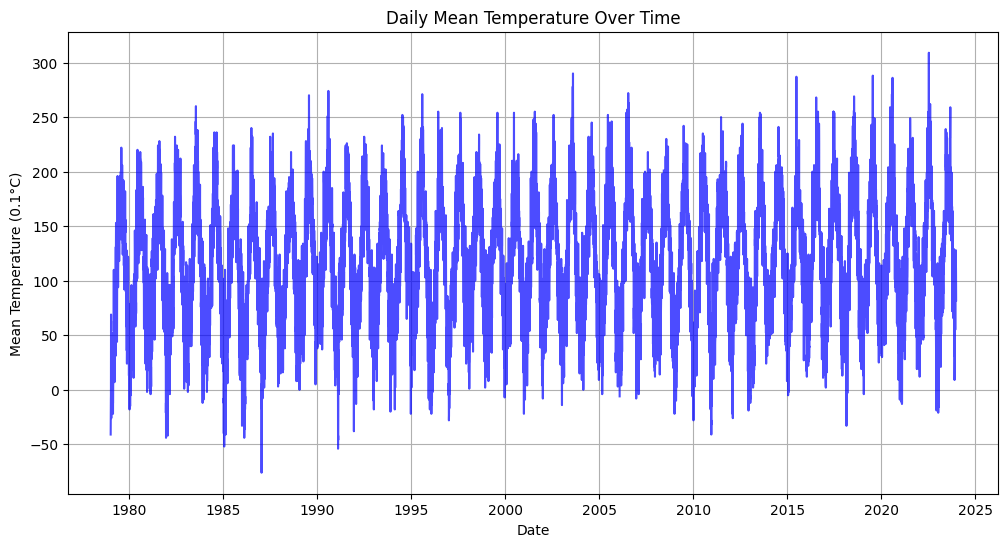

In [6]:
# Plotting the daily mean temperature (TG) over time
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['TG'], color='blue', alpha=0.7)
plt.title('Daily Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (0.1°C)')
plt.grid()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

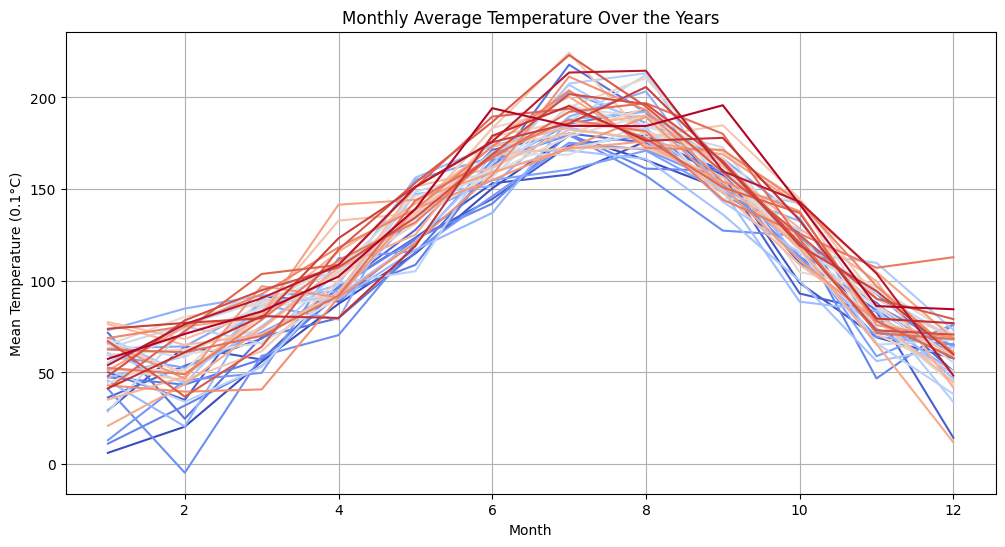

In [7]:
# Extract month and year for aggregation
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month

# Calculate monthly average temperature
monthly_avg_temp = df.groupby(['Year', 'Month'])['TG'].mean().reset_index()

# Visualize the monthly average temperature
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_temp, x='Month', y='TG', hue='Year', palette='coolwarm', legend=None)
plt.title('Monthly Average Temperature Over the Years')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (0.1°C)')
plt.grid()
plt.show()


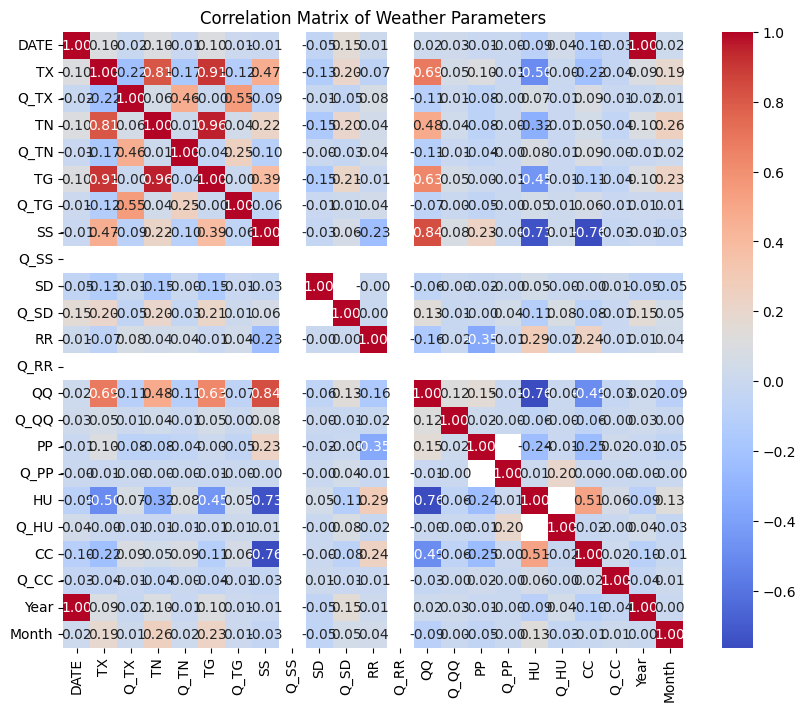

In [8]:
# Correlation matrix of numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather Parameters')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


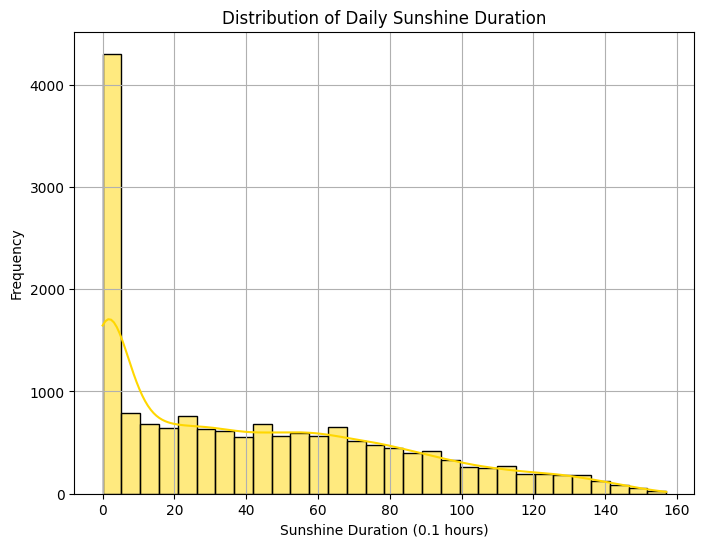

In [9]:
# Distribution of daily sunshine duration
plt.figure(figsize=(8, 6))
sns.histplot(df['SS'], kde=True, color='gold')
plt.title('Distribution of Daily Sunshine Duration')
plt.xlabel('Sunshine Duration (0.1 hours)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


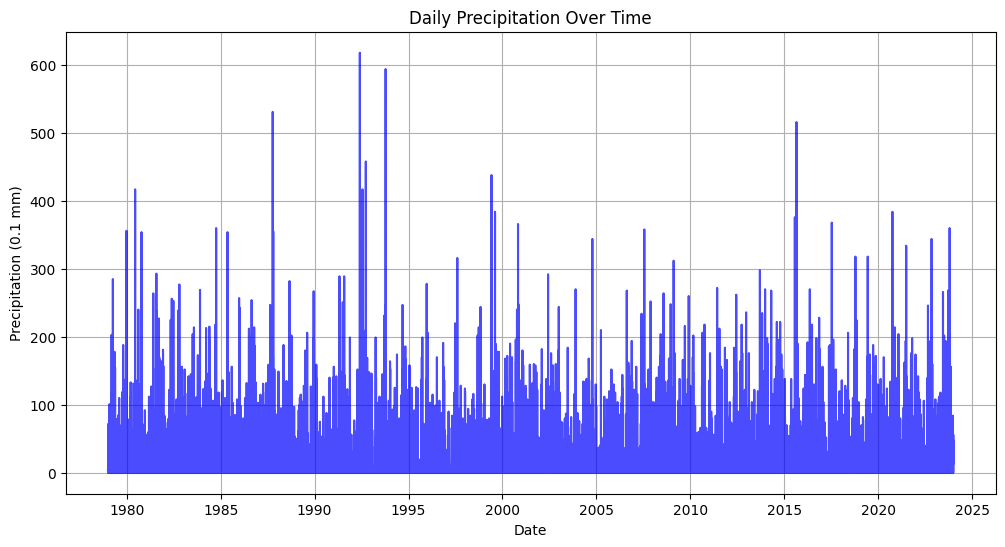

In [10]:
# Plotting daily precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['RR'], color='blue', alpha=0.7)
plt.title('Daily Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (0.1 mm)')
plt.grid()
plt.show()


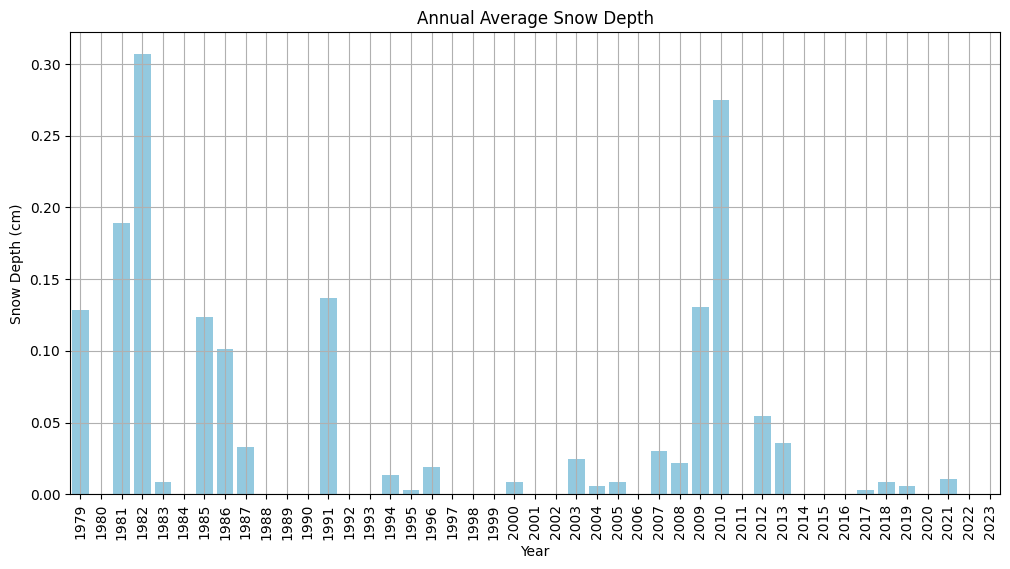

In [11]:
# Calculate annual average snow depth
annual_snow_depth = df.groupby('Year')['SD'].mean().reset_index()

# Plotting annual average snow depth
plt.figure(figsize=(12, 6))
sns.barplot(data=annual_snow_depth, x='Year', y='SD', color='skyblue')
plt.title('Annual Average Snow Depth')
plt.xlabel('Year')
plt.ylabel('Snow Depth (cm)')
plt.xticks(rotation=90)
plt.grid()
plt.show()
